In [10]:
import sys
sys.path.insert(0, "..")

import cv2
import numpy as np
import matplotlib.pyplot as plt
#from albumentations.augmentations.crops.transforms import CropAndPad, Crop 
from tqdm import tqdm

from helper.helper import create_metadata_table

In [2]:
dataset_path = "../../../Dataset/uw-madison-gi-tract-image-segmentation/"
df = create_metadata_table(dataset_path)

100%|█████████████████████████████████████████████████████████████████████████| 38496/38496 [00:02<00:00, 17378.99it/s]


In [3]:
img_path = df["img_path"].sample(1)

In [4]:
img = cv2.imread(img_path.item(), -1)
print(img.shape)

(266, 266)


In [5]:
res = CropAndPad(px=(0, 240), keep_size=False)(image=img)
print(res['image'].shape)



(349, 609)


In [6]:
from helper.pytorch.data import UWMGI2022SegmentationDataset

C:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dataset = UWMGI2022SegmentationDataset(dataset_path)

100%|█████████████████████████████████████████████████████████████████████████| 38496/38496 [00:02<00:00, 16960.80it/s]


In [8]:
for image, mask in dataset:
    print("image:", image.shape, "\nmask:", mask.shape)
    if mask.sum() > 10:
        break

image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: (266, 266, 3)
image: (266, 266) 
mask: 

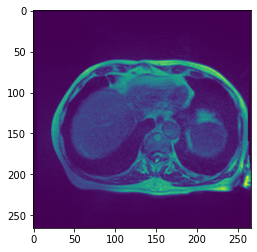

In [11]:
plt.imshow(image)

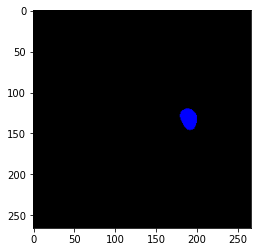

In [12]:
plt.imshow(mask)

# Tests for Dataset

In [13]:
img_shapes = list()
mask_shapes = list()
for image, mask in tqdm(dataset):
    assert image.shape == mask.shape[:2]
    assert len(mask.shape) == 3 and mask.shape[-1] == 3
    #img_shapes.append(image.shape)
    #mask_shapes.append(mask.shape)

100%|███████████████████████████████████████████████████████████████████████████| 38496/38496 [01:14<00:00, 515.32it/s]


KeyError: 38496

# DataLoader test

In [14]:
from torch.utils.data import DataLoader


In [15]:
img_shapes = list()
mask_shapes = list()

dataset = UWMGI2022SegmentationDataset(dataset_path)
for img_batch, mask_batch in tqdm(DataLoader(dataset)):
    assert img_batch.shape[1:] == mask_batch.shape[1:3]
    assert len(mask_batch.shape) == 4 and mask_batch.shape[-1] == 3
    #img_shapes.append(image.shape)
    #mask_shapes.append(mask.shape)

100%|███████████████████████████████████████████████████████████████████████████| 38496/38496 [01:47<00:00, 357.33it/s]


In [16]:
#img_shapes = list()
#mask_shapes = list()

train_shape = (240,240)
transform = Compose([
    PadIfNeeded(min_height=train_shape[0], min_width=train_shape[1]),
    RandomCrop(train_shape[0], train_shape[1], always_apply=False, p=1.0)
])

dataset = UWMGI2022SegmentationDataset(dataset_path, transform=transform)
for img_batch, mask_batch in tqdm(DataLoader(dataset, batch_size=32)):
    
    assert img_batch.shape[1:] == mask_batch.shape[1:3]
    assert len(mask_batch.shape) == 4 and mask_batch.shape[-1] == 3
    #img_shapes.append(img_batch.shape)
    #mask_shapes.append(mask_batch.shape)
    
#print(set(img_shapes))    
#print(set(mask_shapes))

100%|██████████████████████████████████████████████████████████████████████████████| 1203/1203 [02:18<00:00,  8.66it/s]

{torch.Size([32, 240, 240])}
{torch.Size([32, 240, 240, 3])}


In [ ]:
import sys
sys.path.insert(0, "..")

from tqdm import tqdm
from torch.utils.data import DataLoader
from albumentations import Compose
from albumentations.augmentations.transforms import PadIfNeeded
from albumentations.augmentations.crops.transforms import RandomCrop

from helper.pytorch.data import UWMGI2022SegmentationDataset

train_shape = (240,240)
transform = Compose([
    PadIfNeeded(min_height=train_shape[0], min_width=train_shape[1]),
    RandomCrop(train_shape[0], train_shape[1], always_apply=False, p=1.0)
])

dataset_path = "../../../Dataset/uw-madison-gi-tract-image-segmentation/"
dataset = UWMGI2022SegmentationDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

for img_batch, mask_batch in tqdm(dataloader):
    pass
    #if mask_batch.sum() > 0:
    #    break
    


 35%|██████████████████████████▏                                                | 13459/38496 [00:40<01:13, 342.03it/s]

In [18]:
from matplotlib.lines import Line2D
def plot_1d_img_3d_mask(img, mask):
    
    max_val = 2**8
    plt.figure(figsize=(8,8))
    try:
        plt_img = img.numpy().copy()
    except:
        plt_img = img.copy()
    plt_img = np.expand_dims(plt_img, axis=-1)
    plt_img = np.repeat(plt_img, axis=-1, repeats=3)
    print(plt_img.shape, mask.shape)
    plt_img[mask>0] = max_val
    #print(plt_img.dtype)
    plt.imshow(plt_img*max_val)
    
    custom_lines = [
        Line2D([0], [0], color="red", lw=4),
        Line2D([0], [0], color="green", lw=4),
        Line2D([0], [0], color="blue", lw=4)
    ]

    plt.legend(custom_lines, ["large_bowel", "small_bowel", "stomach"])
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(240, 240, 3) torch.Size([240, 240, 3])


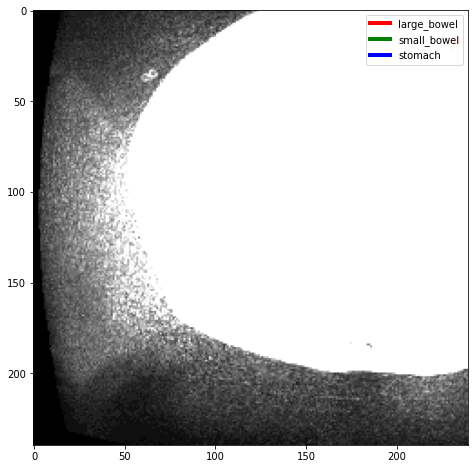

In [19]:
plot_1d_img_3d_mask(img_batch[0], mask_batch[0])

In [20]:
dataset = UWMGI2022SegmentationDataset(dataset_path)

100%|█████████████████████████████████████████████████████████████████████████| 38496/38496 [00:02<00:00, 17309.29it/s]


In [21]:
img, mask = dataset[21398]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(266, 266, 3) (266, 266, 3)


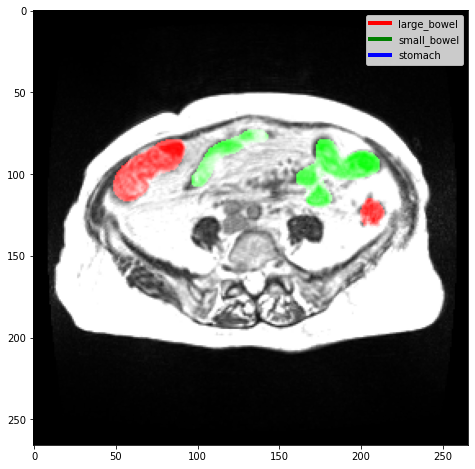

In [22]:
plot_1d_img_3d_mask(img, mask)

In [23]:
from helper.pytorch.data import UWMGI2022SegmentationDataset

In [24]:
import sys
sys.path.insert(0, "..")